**Варіант №1**


Завдання 1
1. Вивести перших 5 рядків

In [1]:
import pandas as pd

url ="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html (url)
df = tables [2]
df. head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

Завдання 1
2. Визначити розмір датасета

In [2]:
dataset_size = df.shape
print(f"Розмір датасету: {dataset_size[0]} рядків і {dataset_size[1]} стовпців")

Розмір датасету: 210 рядків і 7 стовпців


Завдання 1
3. Визначити оптимальну кількість стовпців.

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

df = pd.read_html(StringIO(str(BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)").text, 'html.parser').find('table', {'class': 'wikitable'}))))[0]
num_columns = df.shape[1]
print(f"Кількість стовпців: {num_columns}\nКількість стовпців оптимальна." if num_columns <= 10 else "Кількість стовпців не оптимальна")


Кількість стовпців: 7
Кількість стовпців оптимальна.


Завдання 1
4. Змінити назви стовпців на більш зручні, наприклад
Country MVF_2024 WorldBank_2023 OON_2022

In [6]:
import pandas as pd

df = pd.read_html(StringIO(str(BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)").text, 'html.parser').find('table', {'class': 'wikitable'}))))[0]
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'] + df.columns[4:].tolist()
print(df.head())


         Country   MVF_2024 WorldBank_2023   OON_2022 (World Bank[14], Year)  \
0          World  109529216           2024  105435540                   2023   
1  United States   28781083           2024   27360935                   2023   
2          China   18532633      [n 1]2024   17794782              [n 3]2023   
3        Germany    4591100           2024    4456081                   2023   
4          Japan    4110452           2024    4212945                   2023   

  (United Nations[15], Estimate) (United Nations[15], Year)  
0                      100834796                       2022  
1                       25744100                       2022  
2                       17963170                  [n 1]2022  
3                        4076923                       2022  
4                        4232173                       2022  


Завдання 1
5. Визначити тип даних.

In [7]:
import pandas as pd
print(df.dtypes)

Country                           object
MVF_2024                          object
WorldBank_2023                    object
OON_2022                          object
(World Bank[14], Year)            object
(United Nations[15], Estimate)    object
(United Nations[15], Year)        object
dtype: object


Завдання 1
6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення.

In [8]:
import pandas as pd

df.replace('—', float('NaN'), inplace=True)
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,15
OON_2022,8
"(World Bank[14], Year)",8
"(United Nations[15], Estimate)",1
"(United Nations[15], Year)",1


Завдання 1
7. Ще раз перевірити наявність пропущених значень.

In [9]:
import pandas as pd
print(df.isna().sum())

Country                            0
MVF_2024                          15
WorldBank_2023                    15
OON_2022                           8
(World Bank[14], Year)             8
(United Nations[15], Estimate)     1
(United Nations[15], Year)         1
dtype: int64


Завдання 1
8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [10]:
import pandas as pd
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


Завдання 1
9. Вивести описову статистику датасету describe()


In [11]:
import pandas as pd
print(df.describe())

       Country   MVF_2024 WorldBank_2023   OON_2022 (World Bank[14], Year)  \
count      210        195            195        202                    202   
unique     210        195             12        202                      9   
top      World  109529216           2024  105435540                   2023   
freq         1          1            182          1                    180   

       (United Nations[15], Estimate) (United Nations[15], Year)  
count                             209                        209  
unique                            209                          9  
top                         100834796                       2022  
freq                                1                        201  


Завдання 1
  10. Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [23]:
import pandas as pd
import numpy as np

df['Difference'] = df['MVF_2024'] - df['WorldBank_2023']
print(df.loc[df['Difference'].abs().idxmax()][['Country', 'Difference']])


Country             World
Difference    109527192.0
Name: 0, dtype: object


Завдання 1
  11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [22]:
import pandas as pd

corr = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(corr.stack().idxmax(), corr.stack().max())

('MVF_2024', 'MVF_2024') 1.0


Завдання 1

  12. Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [24]:
means = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("Середнє значення:")
print(means)
print(means.diff())

Середнє значення для кожного стовпця:
MVF_2024          1.123228e+06
WorldBank_2023    2.023962e+03
OON_2022          1.037206e+06
dtype: float64
MVF_2024                   NaN
WorldBank_2023   -1.121204e+06
OON_2022          1.035182e+06
dtype: float64


Завдання 1
  13. Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [40]:
import pandas as pd

df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)", attrs={"class": "wikitable"})[0]
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022'] + df.columns[4:].tolist()

df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')

df['Standard Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

c = df.loc[df['Standard Deviation'].idxmax(), 'Country']
v = df['Standard Deviation'].max()

print("Стандартне відхилення:")
print(df[['Country', 'Standard Deviation']])
print(f"\nНайвища варіативність: {c} з відхиленням {v:.2f}")


Стандартне відхилення:
              Country  Standard Deviation
0               World        6.208756e+07
1       United States        1.622119e+07
2               China        5.217394e+05
3             Germany        2.611400e+06
4               Japan        2.402136e+06
..                ...                 ...
205          Kiribati        9.983668e+02
206             Palau        1.003976e+03
207  Marshall Islands        9.985825e+02
208             Nauru        1.077630e+03
209            Tuvalu        1.131608e+03

[210 rows x 2 columns]

Найвища варіативність: World з відхиленням 62087559.50


Завдання 1

  14. Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [41]:

df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')

for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_country = df.loc[df[col].idxmax(), 'Country']
    min_country = df.loc[df[col].idxmin(), 'Country']
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"\n{col}:")
    print(f"  Найвищий показник: {max_country} ({max_value:.2f})")
    print(f"  Найнижчий показник: {min_country} ({min_value:.2f})")



MVF_2024:
  Найвищий показник: World (109529216.00)
  Найнижчий показник: Tuvalu (66.00)

WorldBank_2023:
  Найвищий показник: World (2024.00)
  Найнижчий показник: Sri Lanka (2022.00)

OON_2022:
  Найвищий показник: World (105435540.00)
  Найнижчий показник: Tuvalu (62.00)


Завдання 1

  15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?


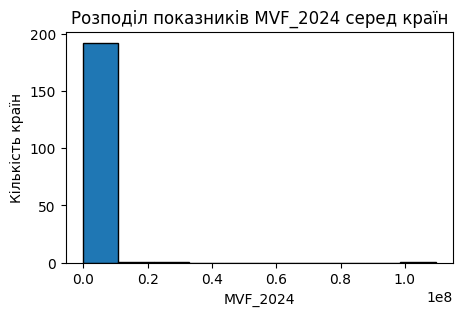

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')

plt.figure(figsize=(5, 3))
plt.hist(df['MVF_2024'].dropna(), bins=10, edgecolor='black')
plt.title('Розподіл показників MVF_2024 серед країн')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.show()


Завдання 1

  16. Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [57]:
df[['MVF_2024', 'WorldBank_2023', 'OON_2022']] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].apply(pd.to_numeric, errors='coerce')

df['MVF_2024_Share'] = df['MVF_2024'] / df['MVF_2024'].sum()
df['WorldBank_2023_Share'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum()
df['OON_2022_Share'] = df['OON_2022'] / df['OON_2022'].sum()

shares = df[['Country', 'MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']]

print("Для кожного року:")
print(shares.head())
shares = df.set_index('Country')[['MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']]

print("З часом:")
print(shares.head())


Для кожного року:
         Country  MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
0          World        0.500066              0.005376        0.503235
1  United States        0.131403              0.005376        0.130591
2          China        0.084613                   NaN        0.084933
3        Germany        0.020961              0.005376        0.021268
4          Japan        0.018767              0.005376        0.020108
З часом:
               MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
Country                                                            
World                0.500066              0.005376        0.503235
United States        0.131403              0.005376        0.130591
China                0.084613                   NaN        0.084933
Germany              0.020961              0.005376        0.021268
Japan                0.018767              0.005376        0.020108


Завдання 1

  17. Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

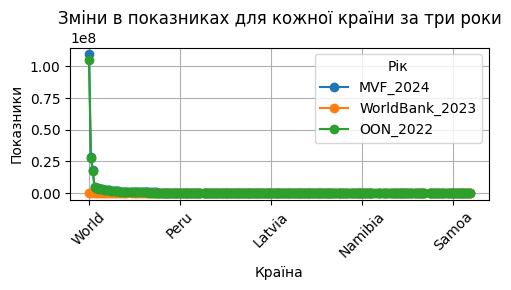

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


data = df.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']]
data.plot(kind='line', marker='o', figsize=(5, 3))

plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Країна')
plt.ylabel('Показники')
plt.legend(title='Рік', labels=['MVF_2024', 'WorldBank_2023', 'OON_2022'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**Висновок: проаналізувала дані про ВВП країн. Оновили структуру таблиці, обробили пропущені значення. Визначила середні значення та стандартне відхилення. Візуалізували зміни показників і розподіл даних.**

**Завдання 2**
  Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.


In [ ]:
import pandas as pd

In [75]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic (1).csv
Перші 5 рядків датасету:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


1. Вивести перших 5 рядків.


In [78]:
df = pd.read_csv('titanic.csv')

print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2. Визначити розмір датасета.

In [79]:
rows, columns = df.shape
print(f"Розмір датасету: {rows} рядків і {columns} стовпців")

Розмір датасету: 418 рядків і 12 стовпців


3. Визначити тип даних.

In [81]:
data_types = df.dtypes
print("Тип даних:")
print(data_types)

Тип даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення

In [94]:
print("Пропущені значення:")
print(df.isnull().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nПісля заміни:")
df.isnull().sum()

Пропущені значення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Після заміни:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


5. Ще раз перевірити наявність пропущених значень

In [88]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [84]:
df.drop_duplicates(inplace=True)
print(f"Дублікати після видалення: {df.duplicated().sum()}")

Дублікати після видалення: 0


7. Вивести описову статистику датасету describe()


In [87]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


8. Видалити стовпчик Cabin


In [95]:
df.drop(columns='Cabin', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


9. Сформувати датасет з обраними стовпцями:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]


In [96]:
selected_columns = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
selected_columns.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
значення даного стовпчика).

In [105]:
selected_columns = df[['Sex']].copy()
print("Унікальні значення 'Sex':")
selected_columns['Sex'].unique()

selected_columns.loc[:, 'Sex'] = selected_columns['Sex'].map({'male': 1, 'female': 0})
selected_columns.head()

Унікальні значення 'Sex':


,Sex
0,1
1,0
2,1
3,1
4,0


11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх
немає).

In [106]:
selected_columns = df[['Sex']].copy()
selected_columns.loc[:, 'Sex'] = selected_columns['Sex'].map({'male': 1, 'female': 0})
print("Кількість пропущених значень:")
selected_columns.isnull().sum()

Кількість пропущених значень:


,0
Sex,0


12. Вивести 5 перших рядків датасету.

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


13. Вивести 5 останніх рядків датасету

In [109]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,30.27259,1,1,2668,22.3583,C


14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?


In [132]:
df = pd.read_csv('titanic.csv')
print("Sex:")
print(df['Sex'].unique())

if 'Sex' in df.columns and 'Survived' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    survival_rate = df.groupby('Sex')['Survived'].mean() * 100
    print("Відсоток виживання:")
    print(survival_rate)


Sex:
['male' 'female']
Відсоток виживання:
Sex
0    100.0
1      0.0
Name: Survived, dtype: float64


15. Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?


In [136]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100

print("Відсоток виживання для кожного класу:")
print(survival_rate_by_class)

highest_survival_class = survival_rate_by_class.idxmax()
highest_survival_rate = survival_rate_by_class.max()

print(f"\nНайвищий рівень виживання: {highest_survival_class} з відсотком {highest_survival_rate:.2f}%")


Відсоток виживання для кожного класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

Клас з найвищим рівнем виживання: 1 з відсотком 46.73%


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?


In [140]:
avg_age_survived = df[df['Survived'] == 1]['Age'].mean()
avg_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Середній вік вижилих: {avg_age_survived:.2f}")
print(f"Середній вік невижилих: {avg_age_not_survived:.2f}")


Середній вік вижилих: 30.27
Середній вік невижилих: 30.27


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?


In [143]:
fare_groups = pd.cut(df['Fare'], bins=[0, 50, 100, 150, 200, 512.329])
survival_rate_by_fare = df.groupby(fare_groups, observed=False)['Survived'].mean()
print(survival_rate_by_fare)


Fare
(0.0, 50.0]         0.325373
(50.0, 100.0]       0.489796
(100.0, 150.0]      0.555556
(150.0, 200.0]      0.500000
(200.0, 512.329]    0.647059
Name: Survived, dtype: float64


18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?

In [146]:
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()

print(average_fare_by_class)

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [148]:
import pandas as pd
average_age_by_class = df.groupby('Pclass')['Age'].mean()
print(average_age_by_class)

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
не вижив. Чи є видимі відмінності у вікових групах (дати
відповідь)?

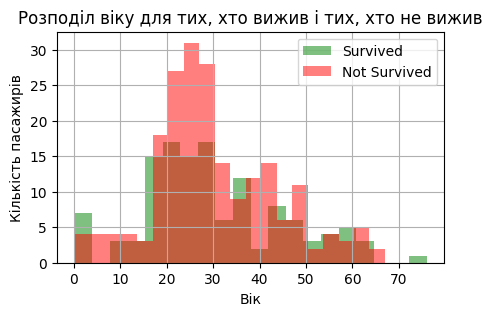

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.5, color='green', label='Survived')
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.5, color='red', label='Not Survived')

plt.title('Розподіл віку для тих, хто вижив і тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.grid(True)
plt.show()


21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?

In [157]:
survival_rate = df.groupby(['Sex', 'Pclass'])['Survived'].mean()

print("Відсоток виживання:")
print(survival_rate)
max_survival_group = survival_rate.idxmax()
max_survival_rate = survival_rate.max()

print(f"\nКомбінація з найвищим рівнем виживання: {max_survival_group} з відсотком {max_survival_rate:.2f}")


Відсоток виживання:
Sex  Pclass
0    1         1.0
     2         1.0
     3         1.0
1    1         0.0
     2         0.0
     3         0.0
Name: Survived, dtype: float64

Комбінація з найвищим рівнем виживання: (0, 1) з відсотком 1.00


22. Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [159]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
correlation = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print("Кореляція між змінними:")
print(correlation)
print("\nКореляція з виживанням:")
print(correlation['Survived'])


Кореляція між змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000

Кореляція з виживанням:
Survived    1.000000
Pclass     -0.108615
Age        -0.000011
Fare        0.191382
Name: Survived, dtype: float64


**Висновок:** Висновок: 15) найвищий рівень виживання спостерігається у пасажирів першого класу, де виживання складає 46.73%
16) середній вік і тих і тих 30,27
17) Найвищий рівень виживання спостерігається у пасажирів з тарифом більше 200
18) Перший клас має значно вищий середній тариф порівняно з другим і третім класами
19)  середній вік пасажирів з першого класу є найвищим, тоді як пасажири з третього класу є наймолодшими
20) так
21) Найвищий рівень виживання мав група жінок у всіх класах, де він складав 100%. Чоловіки в усіх класах мали 0% рівень виживання
22) З усіх числових змінних, Fare має найсильнішу позитивну кореляцію з виживанням (0.191382). Інші змінні, такі як Pclass і Age, мають дуже слабку кореляцію з виживанням.